Import required libraries and functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
pd.set_option('display.max_columns', None)

Load the dataset and read

In [2]:
df=pd.read_csv("KDDCUP1999.csv")

In [3]:
df.head()
df.value_counts()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  lnum_compromised  lroot_shell  lsu_attempted  lnum_root  lnum_file_creations  lnum_shells  lnum_access_files  lnum_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  label  
0         icmp           ecr_i    SF    1032       0          0     0               0       0    0                  0          0                 0            0              0          0                    0            0                  0                   0              0               511    511        0.0          0.0              0.

Number of unique labels

In [4]:
print("Total number of attack of each type: ")
print(df['label'].value_counts())
print("Number of unique labels/attacks: ", df['label'].unique().size)

Total number of attack of each type: 
smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
rootkit.                13
xterm.                  13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
loadmodule.              2
perl.                    2
udpstorm.                2
worm.                    2
phf.             

Sampling 1000 or less attacks of each type to remove class imbalance

In [5]:
#data sampling
df=df.groupby('label').filter(lambda x : len(x)>50)
df['label'].value_counts()


smurf.            164091
normal.            60593
neptune.           58001
snmpgetattack.      7741
mailbomb.           5000
guess_passwd.       4367
snmpguess.          2406
satan.              1633
warezmaster.        1602
back.               1098
mscan.              1053
apache2.             794
processtable.        759
saint.               736
portsweep.           354
ipsweep.             306
httptunnel.          158
pod.                  87
nmap.                 84
Name: label, dtype: int64

In [6]:
# sample 1000 or less samples from dataset
def nsample(x,n):
    if len(x) <= n:
        return x
    else:
        return x.sample(n=n)

df=df.groupby(df['label'])
n_max = 1000
df=df.apply(lambda x: nsample(x, n_max)).reset_index(drop=True)

Change all textual data to numeric data

In [7]:
# label "label" , "protocol_type", and "service" with numeric values
lab_map=dict(enumerate(df['label'].unique()))
pt_map=dict(enumerate(df['protocol_type'].unique()))
ser_map=dict(enumerate(df['service'].unique()))
flag_map=dict(enumerate(df['flag'].unique()))

#flip key into value for easier access
lab_map = dict([(value, key) for key, value in lab_map.items()])
pt_map = dict([(value, key) for key, value in pt_map.items()])
ser_map = dict([(value, key) for key, value in ser_map.items()])
flag_map = dict([(value, key) for key, value in flag_map.items()])

#map them to integers
df['label']=df['label'].replace(lab_map)
df['protocol_type']=df['protocol_type'].replace(pt_map)
df['service']=df['service'].replace(ser_map)
df['flag']=df['flag'].replace(flag_map)

In [8]:
#shuffle the dataset
df=df.sample(frac=1, random_state=1).reset_index()

In [9]:
len(lab_map)

19

Normalize the data

In [10]:
#standardizing the data
scaler=StandardScaler()

#select all columns except label
X=df.iloc[:, :42]
y=df.iloc[:,42]
X_scaled=scaler.fit_transform(X)


Applying PCA

In [11]:
#applying pca for dimension reduction
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X_scaled)

Train test split without pca and standardization


In [12]:
X_train_nopca, X_test_nopca, y_train_nopca, y_test_nopca= train_test_split(X_scaled, y, random_state=5, test_size=0.3)

Train test split with pca

In [13]:
#train test split
X_train_pca , X_test_pca, y_train_pca, y_test_pca= train_test_split(X_pca, y, random_state=1, test_size=0.3)

Training classification models without applying pca

In [14]:
#model training
#linear regression
reg_model_nopca=LinearRegression()
reg_model_nopca.fit(X_train_nopca, y_train_nopca)
reg_score_nopca=float('{:.2f}'.format(reg_model_nopca.score(X_test_nopca, y_test_nopca)*100))
reg_score_nopca



-1.9555749561147305e+21

In [15]:
#decision tree
tree_model_nopca=DecisionTreeClassifier(max_depth=5)
tree_model_nopca.fit(X_train_nopca, y_train_nopca)
tree_score_nopca=float('{:.2f}'.format(tree_model_nopca.score(X_test_nopca, y_test_nopca)*100))
tree_score_nopca

41.57

In [16]:
#support vector machine
svm_model=svm.SVC(kernel = 'linear', random_state = 1, C=1.0)
svm_model.fit(X_train_nopca, y_train_nopca)
svm_score_nopca=float('{:.2f}'.format(svm_model.score(X_test_nopca, y_test_nopca)*100))
svm_score_nopca  

99.56

In [17]:
#knn
knn_model_nopca=KNeighborsClassifier(n_neighbors=20)
knn_model_nopca.fit(X_train_nopca, y_train_nopca)
knn_score_nopca=float('{:.2f}'.format(knn_model_nopca.score(X_test_nopca, y_test_nopca)*100))
knn_score_nopca

98.06

Training classification models with pca

In [18]:
# #linear regression
# reg_model_pca=LinearRegression()
# reg_model_pca.fit(X_train_pca, y_train_pca)
# # reg_score=reg_model.score(X_test_nopca, y_test_nopca)*100
# reg_score_pca=float('{:.2f}'.format(reg_model_pca.score(X_test_pca, y_test_pca)*100))
# reg_score_pca

In [19]:
# #decision tree
# tree_model_pca=DecisionTreeClassifier(max_depth=5)
# tree_model_pca.fit(X_train_pca, y_train_pca)
# tree_score_pca=float('{:.2f}'.format(tree_model_pca.score(X_test_pca, y_test_pca)*100))
# tree_score_pca

In [20]:
# #support vector machine
# svm_model_pca=svm.SVC(kernel = 'linear', random_state = 1, C=1.0)
# svm_model_pca.fit(X_train_pca, y_train_pca)
# svm_score_pca=float('{:.2f}'.format(svm_model_pca.score(X_test_pca, y_test_pca)*100))
# svm_score_pca

In [21]:
# #knn classifier
# knn_model_pca=KNeighborsClassifier(n_neighbors=5)
# knn_model_pca.fit(X_train_pca, y_train_pca)
# knn_score_pca=float('{:.2f}'.format(knn_model_pca.score(X_test_pca, y_test_pca)*100))
# knn_score_pca

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Network training and testing

In [22]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(10,)))
    model.add(Dense(144, activation='relu'))
    model.add(Dense(72, activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(len(lab_map), activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
model = classification_model()

# fit the model
model.fit(X_train_pca, y_train_pca, validation_data=(X_test_pca, y_test_pca), epochs=1000, verbose=2)

# evaluate the model
scores = model.evaluate(X_test_pca, y_test_pca, verbose=0)

Epoch 1/1000


2022-10-05 19:42:17.125396: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 - 1s - loss: 0.9917 - accuracy: 0.6948 - val_loss: 0.4657 - val_accuracy: 0.8093 - 697ms/epoch - 2ms/step
Epoch 2/1000
313/313 - 0s - loss: 0.3732 - accuracy: 0.8602 - val_loss: 0.2735 - val_accuracy: 0.9092 - 261ms/epoch - 833us/step
Epoch 3/1000
313/313 - 0s - loss: 0.2660 - accuracy: 0.9045 - val_loss: 0.2240 - val_accuracy: 0.9076 - 224ms/epoch - 716us/step
Epoch 4/1000
313/313 - 0s - loss: 0.2111 - accuracy: 0.9226 - val_loss: 0.2127 - val_accuracy: 0.9069 - 224ms/epoch - 716us/step
Epoch 5/1000
313/313 - 0s - loss: 0.1848 - accuracy: 0.9304 - val_loss: 0.1891 - val_accuracy: 0.9267 - 223ms/epoch - 714us/step
Epoch 6/1000
313/313 - 0s - loss: 0.1563 - accuracy: 0.9426 - val_loss: 0.1407 - val_accuracy: 0.9423 - 224ms/epoch - 717us/step
Epoch 7/1000
313/313 - 0s - loss: 0.1579 - accuracy: 0.9443 - val_loss: 0.1582 - val_accuracy: 0.9381 - 224ms/epoch - 716us/step
Epoch 8/1000
313/313 - 0s - loss: 0.1355 - accuracy: 0.9501 - val_loss: 0.1230 - val_accuracy: 0.9599 - 232ms/ep

In [24]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Accuracy: 0.9939308762550354% 
 Error: 0.0060691237449646


In [ ]:
model.summary()

134/134 [==============================] - 0s 299us/step


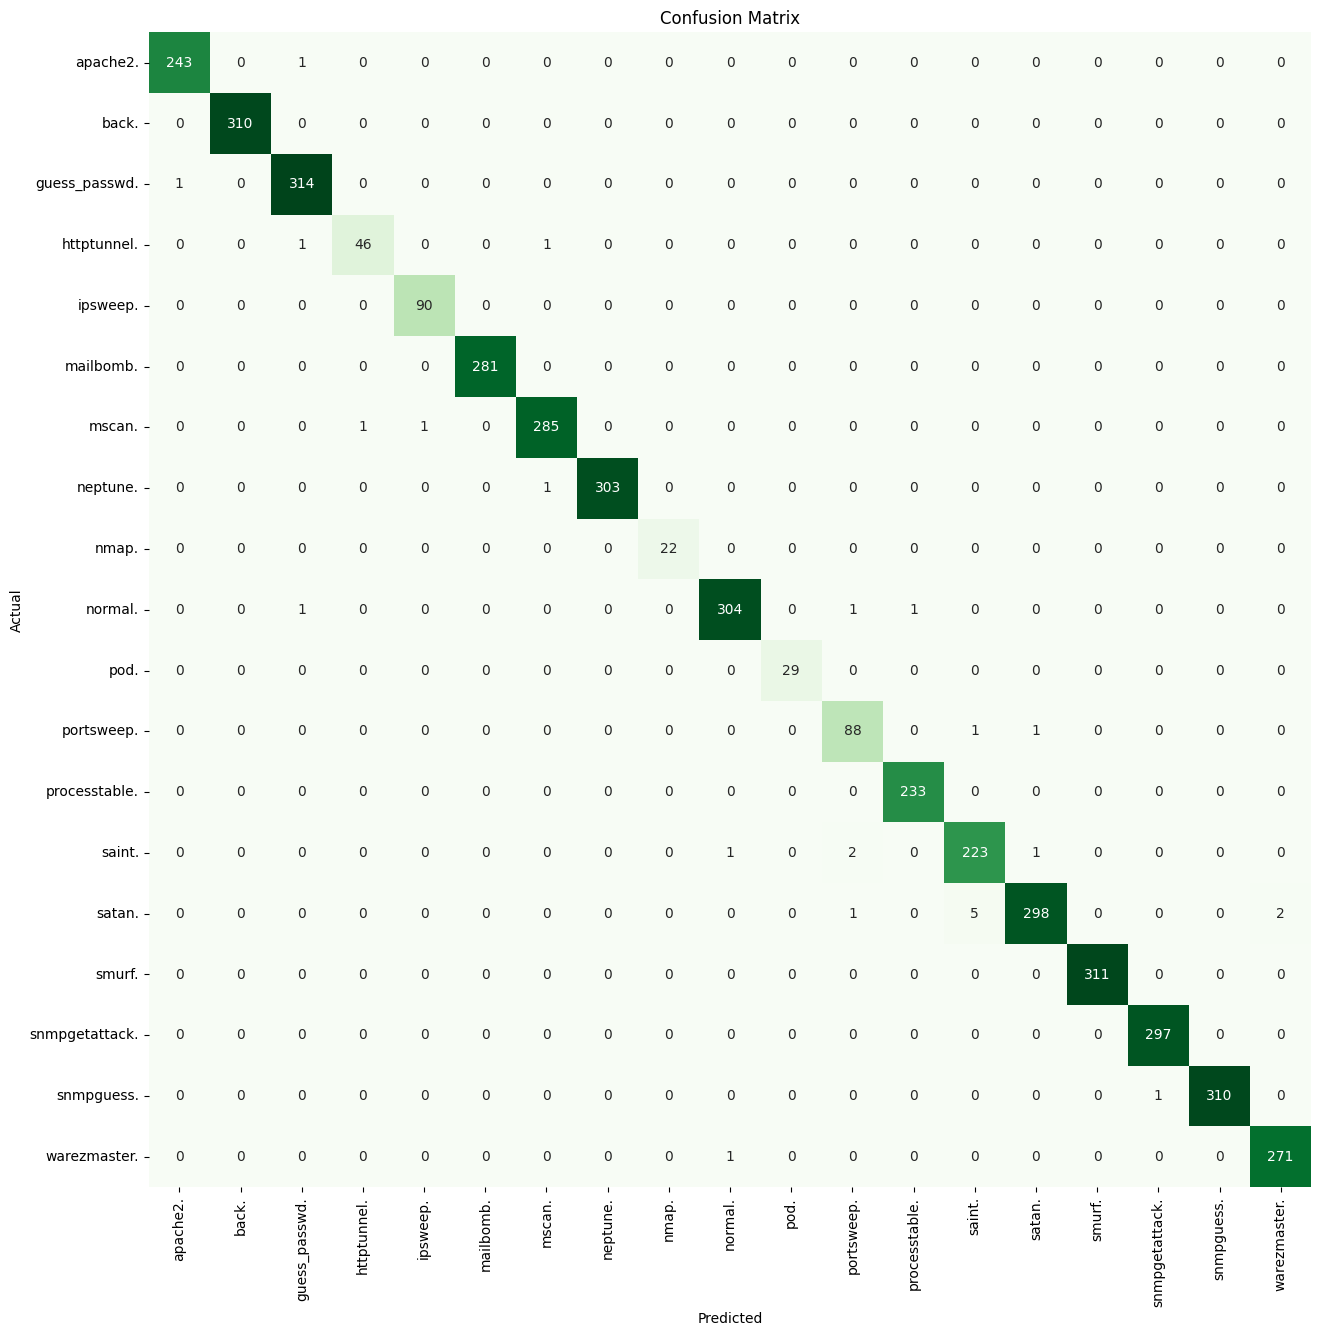

In [25]:
y_pred = np.argmax(model.predict(X_test_pca), axis=1)
con_matrix = confusion_matrix(y_test_pca, y_pred)
# clr = classification_report(y_test_pca, y_pred, target_names=list(lab_map.keys()))

plt.figure(figsize=(15, 15))
sns.heatmap(con_matrix, annot=True, vmin=0, fmt='g', cmap='Greens', cbar=False)
plt.xticks(ticks=np.arange(len(lab_map)) + 0.5, labels=list(lab_map.keys()), rotation=90)
plt.yticks(ticks=np.arange(len(lab_map)) + 0.5, labels=list(lab_map.keys()), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

In [ ]:
print("Precision score: ")
print("Weighted: ", precision_score(y_test_pca, y_pred, average='weighted'))
print("Micro: ", precision_score(y_test_pca, y_pred, average='micro'))
print("Macro: ", precision_score(y_test_pca, y_pred, average='macro'))

con_matrix.sum(axis=0)

In [ ]:
#check if there is any unpredicted or untested class
#set(y_test_pca) - set(y_pred)

In [ ]:
print("Weighted: ", f1_score(y_test_pca, y_pred, average='weighted'))
print("Micro: ", f1_score(y_test_pca, y_pred, average='micro'))
print("Macro: ", f1_score(y_test_pca, y_pred, average='macro'))